# Imports

In [2]:
import os 
import cv2
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.optimizers import Adam
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D


# Load images as data and perform data augmentation

- For data augmentation, `opencv-python` is used.
- The images are resized and horizontally flipped before adding to dataset.

In [3]:
images = []
labels = []
trial = []

PATH="/home/fastbyte/Downloads/flowers/"

## Daisy Inputs

In [4]:
for img in os.listdir(PATH + "daisy/") :
    label = 0
    path = os.path.join(PATH + 'daisy/', img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

# print(images)

## Dandelion Inputs

In [5]:
for img in os.listdir(PATH + "dandelion/") :
    label = 1
    path = os.path.join(PATH + "dandelion/", img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

## Rose Inputs

In [6]:
for img in os.listdir(PATH + "rose/") :
    label = 2
    path = os.path.join(PATH + "rose/", img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

## Sunflower Inputs

In [7]:
for img in os.listdir(PATH + "sunflower/") :
    label = 3
    path = os.path.join(PATH + "sunflower/", img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

## Tulip Inputs

In [8]:
for img in os.listdir(PATH + "tulip/") :
    label = 4
    path = os.path.join(PATH + "tulip/", img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

In [9]:
print(len(images))
print(len(labels))

8634
8634


In [10]:
images = np.array(images)

# Visualizing Image using Matplotlib

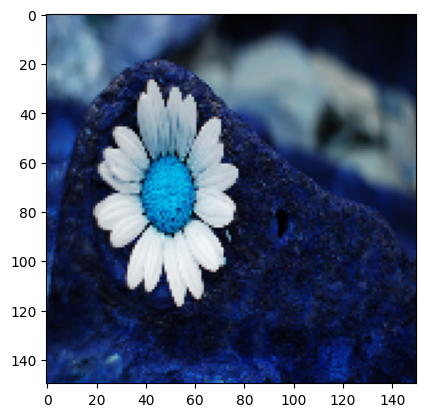

In [11]:
plt.imshow(images[6])
plt.show()

# Data Preparation

In [12]:
labels = keras.utils.to_categorical(labels,num_classes = 5)

In [13]:
print(labels)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [14]:
x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size = 0.2,random_state = 13)

In [15]:
x_train.shape

(6907, 150, 150, 3)

In [16]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 7)

# Train model

In [17]:
model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=x_train.shape[1:]))
model.add(LeakyReLU(alpha=0.02))
    
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(LeakyReLU(alpha=0.02))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(GlobalMaxPooling2D())
    
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.02))
model.add(Dropout(0.5)) 

model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

2022-10-06 22:20:12.053800: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-06 22:20:12.062267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 22:20:12.063413: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 22:20:12.065030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 148, 148, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 72, 72, 128)       0         
                                                        

In [18]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [19]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [20]:
history = model.fit(
    x_train, y_train, 
    epochs=25, 
    batch_size=32, 
    validation_data=(x_val, y_val))

2022-10-06 22:20:38.595920: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 396225000 exceeds 10% of free system memory.
2022-10-06 22:20:39.554734: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 396225000 exceeds 10% of free system memory.


Epoch 1/25


2022-10-06 22:20:48.978393: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-10-06 22:20:56.952193: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-10-06 22:20:56.952351: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-10-06 22:20:57.711019: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains

  1/184 [..............................] - ETA: 1:04:20 - loss: 130.0942 - accuracy: 0.1250

2022-10-06 22:21:01.553626: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-10-06 22:21:01.553659: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


184/184 [==============================] - ETA: 0s - loss: 5.4236 - accuracy: 0.4179

2022-10-06 22:21:27.075713: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69997500 exceeds 10% of free system memory.
2022-10-06 22:21:27.300117: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69997500 exceeds 10% of free system memory.


184/184 [==============================] - 51s 162ms/step - loss: 5.4236 - accuracy: 0.4179 - val_loss: 1.2862 - val_accuracy: 0.4204
Epoch 2/25
184/184 [==============================] - 26s 142ms/step - loss: 1.1333 - accuracy: 0.5583 - val_loss: 1.0570 - val_accuracy: 0.5815
Epoch 3/25
184/184 [==============================] - 27s 146ms/step - loss: 0.9808 - accuracy: 0.6227 - val_loss: 0.9771 - val_accuracy: 0.6201
Epoch 4/25
184/184 [==============================] - 27s 149ms/step - loss: 0.9286 - accuracy: 0.6412 - val_loss: 0.9154 - val_accuracy: 0.6442
Epoch 5/25
184/184 [==============================] - 28s 154ms/step - loss: 0.8697 - accuracy: 0.6652 - val_loss: 0.8230 - val_accuracy: 0.7040
Epoch 6/25
184/184 [==============================] - 31s 168ms/step - loss: 0.8536 - accuracy: 0.6787 - val_loss: 0.7971 - val_accuracy: 0.7175
Epoch 7/25
184/184 [==============================] - 33s 179ms/step - loss: 0.8161 - accuracy: 0.6932 - val_loss: 0.7534 - val_accuracy: 0.7

In [21]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100))
'''
---- Prev op ----
54/54 [==============================] - 6s 103ms/step - loss: 0.6752 - accuracy: 0.7678
Test Accuracy: 76.78%
'''

2022-10-06 22:45:33.476645: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 116572500 exceeds 10% of free system memory.


54/54 [==============================] - 5s 89ms/step - loss: 0.6104 - accuracy: 0.7805
Test Accuracy: 78.05%


'\n---- Prev op ----\n54/54 [==============================] - 6s 103ms/step - loss: 0.6752 - accuracy: 0.7678\nTest Accuracy: 76.78%\n'

# Save model

In [22]:
model.save_weights('Assignment_3_weights_final.h5')

# Visualizing training results

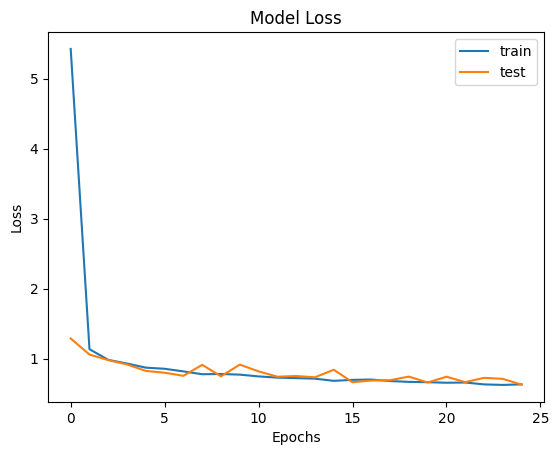

In [23]:
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

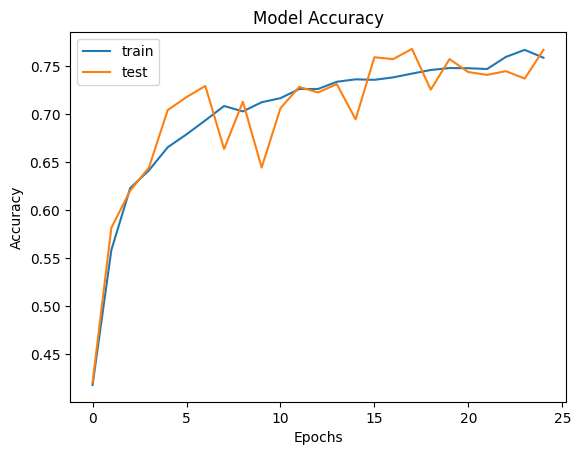

In [24]:
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()